In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import matplotlib.pyplot as plt

In [2]:
banking = pd.read_csv("Data/banking3.csv", index_col=0)

In [3]:
banking.head()

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [4]:
X = banking.drop(columns="y")
y = banking["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
logreg = LogisticRegression()
Lresult = logreg.fit(X_train, y_train)
y_pred = Lresult.predict(X_test)

In [6]:
confusion_matrix_res = confusion_matrix(y_test, y_pred)
print(confusion_matrix_res)
print(classification_report(y_test, y_pred))
preds_logreg = logreg.predict_proba(X_test)[:, 1]

[[10880   101]
 [ 1125   251]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [7]:
fpr, tpr, thresholds = roc_curve(y_test, preds_logreg)
roc_auc_logreg = auc(fpr, tpr)
print(f"AUC: {roc_auc_logreg}")

AUC: 0.7904865870329937


In [8]:
AUC_df = pd.DataFrame(data=[fpr, tpr, thresholds], index=["FPR", "TPR", "Threshold"]).T
AUC_df[AUC_df['Threshold'] > 0.50].sort_values(by = 'Threshold')

,FPR,TPR,Threshold
161,0.009198,0.182413,0.504433
160,0.009198,0.180233,0.523294
159,0.009107,0.180233,0.523420
158,0.009016,0.179506,0.523545
157,0.009016,0.178779,0.524047
...,...,...,...
4,0.000182,0.003634,0.835923
3,0.000182,0.001453,0.836818
2,0.000091,0.001453,0.836887
1,0.000000,0.000727,0.836955


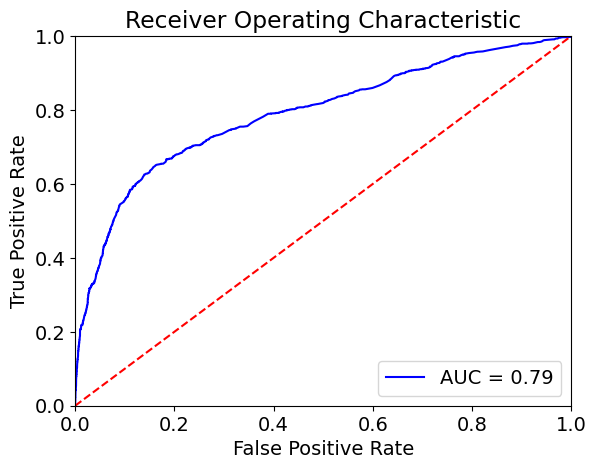

In [9]:
plt.rc("font", size=14)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc_logreg)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()